# *Customer Segmentation*
<i>Author : Vinitha Palani</i><br>
<i>Date   : July 10th, 2017<i><br>

## Table of contents <a id='Table-of-contents'></a>

1. [Problem Definition](#Problem)

2. [Required libraries](#Required-libraries)

3. [Load data](#Load-data)

4. [Data Clean-up](#cleanup)
    
5. [Checking the data](#Checking-the-data)
    
6. [Exploratory Data analysis](#EDA)

7. [Outliers](#Outliers)
    
8. [Feature Engineering](#Feature)
    - [Apply Transformations](#Feature12)
    
9. [Outliers](#Outliers)

9. [Feature Selection](#Feature-Selection)

10. [Clustering](#clustering)
   - [K means ](#K means)
     - [K means : Evaluation and Interpretation ](#K means eval)

12. [Spot-check Algorithms](#Spot-check)

13. [Hyper-parameter Optimisation](#Hyperparameters)

14. [A single Pipeline](#Pipeline)

15. [Finalize the model](#Pickle)

16. [If I had more time..](#time)

17. [Acknowledgements](#Acknowledgement)



<a id='Problem'></a>

# Problem Definition

[[ go back to the top ]](#Table-of-contents)

From Professor Barbara Kahn's <b>Introduction to Marketing</b> , a Coursera course that i took some time back.<br> 
<I><b>Segmentation and targeting. And this is a critical idea for marketing and very important for is brand positioning. It's called the STP framework: segmentation, targeting and positioning.Segmentation says that you identify variables that allows one to segment the market, to figure out different schemes for how to break up the market into different market segments. The second part, the T is targeting. You would evaluate the attractiveness of each of the segments and you choose a segment to target. And the third piece is positioning. Once you get your targets segment, you position your brand and your product to meet the needs of that target segment.</b></I> <br>
<br>
The dataset is the Wholesale customers Data Set https://archive.ics.uci.edu/ml/datasets/Wholesale+customers<br>
<I>Abstract: </I>The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories<br>
<b>Attribute Information:</b><br>
1) FRESH: annual spending (m.u.) on fresh products (Continuous)<br>
2) MILK: annual spending (m.u.) on milk products (Continuous)<br>
3) GROCERY: annual spending (m.u.)on grocery products (Continuous)<br>
4) FROZEN: annual spending (m.u.)on frozen products (Continuous) <br>
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br> 
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)<br>
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) <br>
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) <br>
<b>Descriptive Statistics:</b> 

(Minimum, Maximum, Mean, Std. Deviation) <br>
FRESH ( 3, 112151, 12000.30, 12647.329) <br>
MILK (55, 73498, 5796.27, 7380.377) <br>
GROCERY (3, 92780, 7951.28, 9503.163) <br>
FROZEN (25, 60869, 3071.93, 4854.673) <br>
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) <br>
DELICATESSEN (3, 47943, 1524.87, 2820.106) <br>
<br>
<b>REGION Frequency </b>
Lisbon 77 <br>
Oporto 47 <br>
Other Region 316 <br>
Total 440 <br>

<b>CHANNEL Frequency </b>
Horeca 298 <br>
Retail 142 <br>
Total 440 <br>
<br>

With this project I intend to explore the different Clustering Algoritmns and compare the execution time, performance, pros and cons of each of them.  

<a id='#Required-libraries'></a>

# Required Libraries

[[ go back to the top ]](#Table-of-contents)

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib.pyplot as plt
#print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
%matplotlib inline

Python: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.3
pandas: 0.18.1
sklearn: 0.18.1
seaborn: 0.7.1


<a id='#Load-data'></a>

# Load data

[[ go back to the top ]](#Table-of-contents)


In [3]:
data = pd.read_csv("Wholesale customers data.csv")

In [9]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


<a id='#cleanup'></a>

# Data clean-up

[[ go back to the top ]](#Table-of-contents)
<br>

In [14]:
#Is there any missing data?
sparse_columns = [index for (index,count) in enumerate(data.count()) if count != data.shape[0]]
data[sparse_columns].values

array([], shape=(440, 0), dtype=float64)

Ok..none, makes sense, UCI datasets are curated.

<a id='#Checking-the-data'></a>

# Checking the data

[[ go back to the top ]](#Table-of-contents)

#### Datatype of each feature

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


No non-numeric variables , Region and Channel are categorical nominal variables but with numeric values. 

#### Descriptive Statistics

In [17]:
data.drop(['Channel','Region'], axis=1).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<a id='#EDA'></a>

# Exploratory Data Analysis

[[ go back to the top ]](#Table-of-contents)<br>

C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


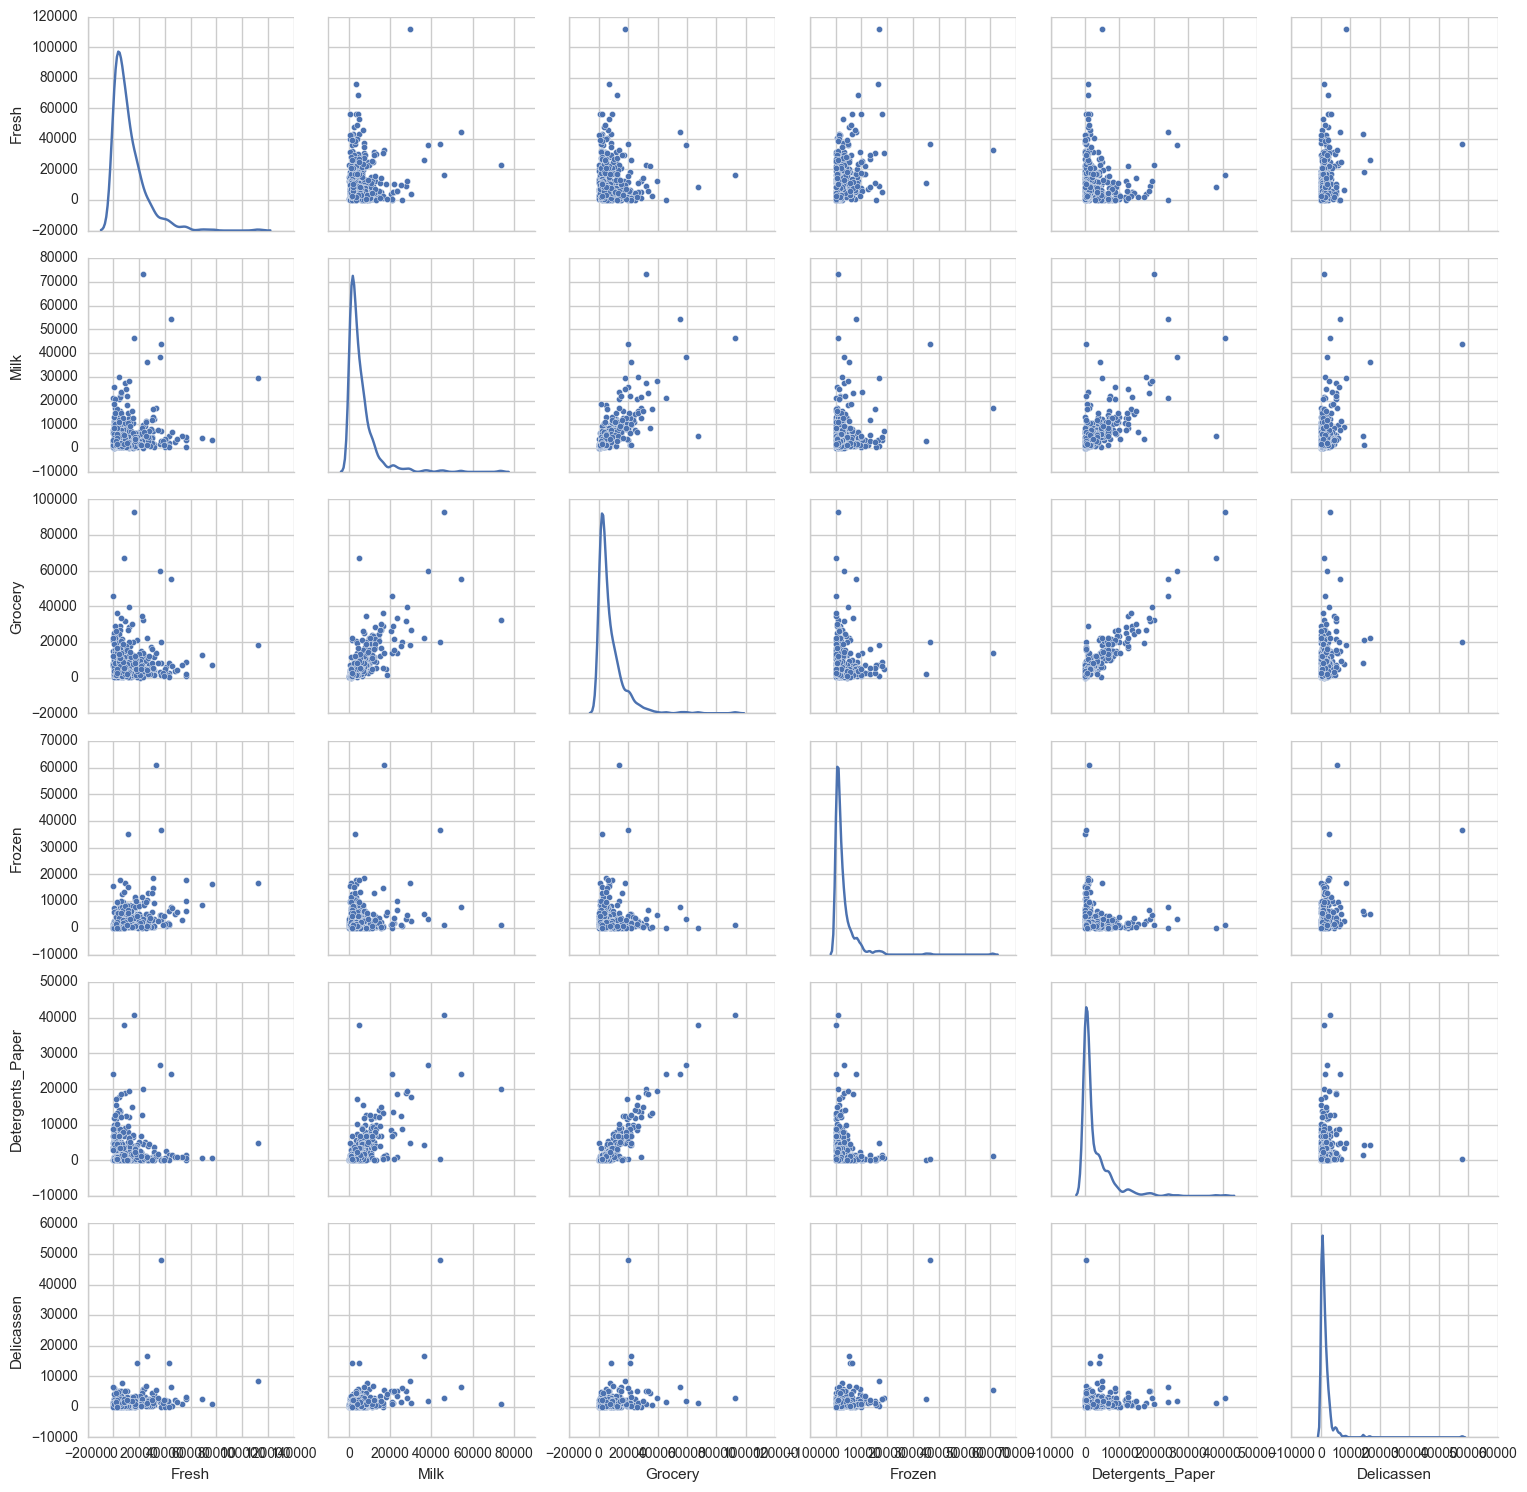

In [22]:
sns.set_style("whitegrid")
sns.pairplot(data.drop(['Channel','Region'], axis=1), diag_kind="kde", palette='hus1')

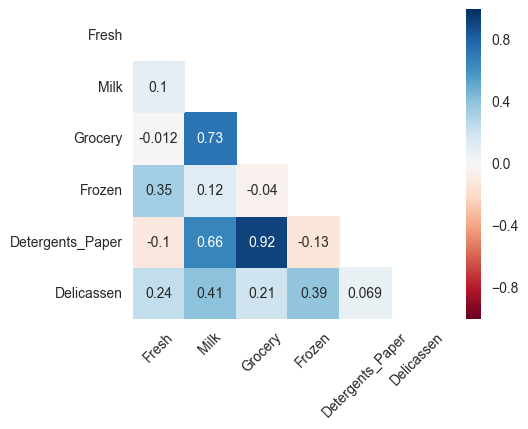

In [27]:
# correlation
corr = data.drop(['Channel','Region'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')
    plt.xticks(rotation=45, ha='center')

In [44]:
# Selecting random customers from the dataset
indices = [5, 250, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.drop(['Channel','Region'], axis=1).loc[indices], columns = data.keys()).reset_index(drop = True)
samples.dropna(axis=1,inplace=True)

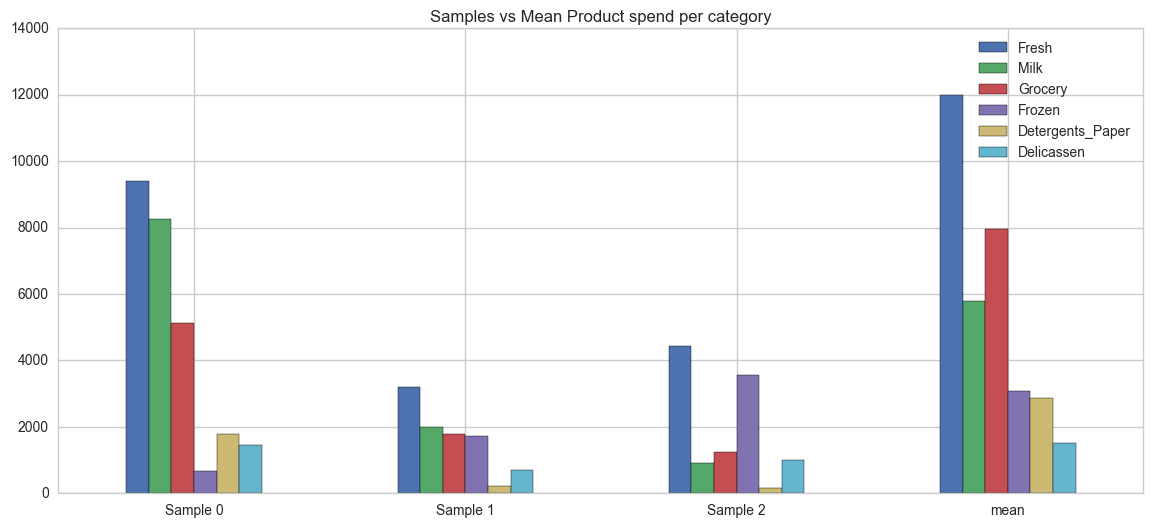

In [45]:
# Compare samples and the average total cost spend per product category
samples_bar = samples.append(data.drop(['Channel','Region'], axis=1).describe().loc['mean'])
samples_bar.index = ['Sample 0', 'Sample 1', 'Sample 2', 'mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6),rot=0, title='Samples vs Mean Product spend per category')

In [46]:
# Selecting random customers from the dataset
indices = [10, 300, 430]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.drop(['Channel','Region'], axis=1).loc[indices], columns = data.keys()).reset_index(drop = True)
samples.dropna(axis=1,inplace=True)

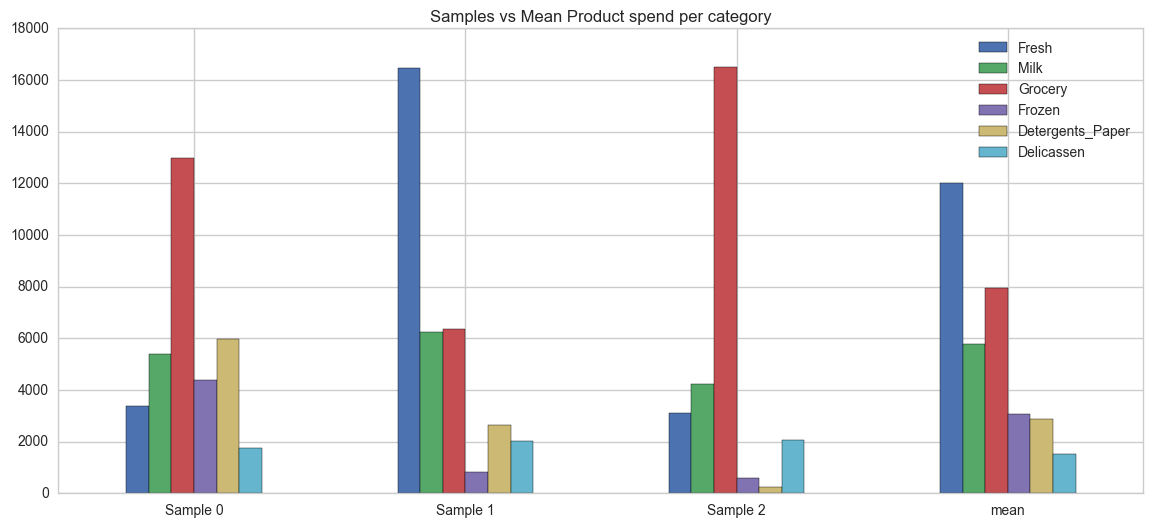

In [47]:
# Compare samples and the average total cost spend per product category
samples_bar = samples.append(data.drop(['Channel','Region'], axis=1).describe().loc['mean'])
samples_bar.index = ['Sample 0', 'Sample 1', 'Sample 2', 'mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6),rot=0, title='Samples vs Mean Product spend per category')

In [4]:
products = data.drop(['Channel','Region'], axis=1)

In [5]:
products['total'] = products.sum(axis=1)

In [65]:
products

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
0,12669,9656,7561,214,2674,1338,34112
1,7057,9810,9568,1762,3293,1776,33266
2,6353,8808,7684,2405,3516,7844,36610
3,13265,1196,4221,6404,507,1788,27381
4,22615,5410,7198,3915,1777,5185,46100
5,9413,8259,5126,666,1795,1451,26710
6,12126,3199,6975,480,3140,545,26465
7,7579,4956,9426,1669,3321,2566,29517
8,5963,3648,6192,425,1716,750,18694
9,6006,11093,18881,1159,7425,2098,46662


In [66]:
products['total'].describe()

count       440.000000
mean      33226.136364
std       26356.301730
min         904.000000
25%       17448.750000
50%       27492.000000
75%       41307.500000
max      199891.000000
Name: total, dtype: float64

In [71]:
products[(products['total'] < 17448) & (products['total'] >= 904)].sort('total').head(50)

C:\Users\Vini\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
154,622,55,137,75,7,8,904
97,403,254,610,774,54,63,2158
98,503,112,778,895,56,132,2476
355,190,727,2012,245,184,127,3485
131,2101,589,314,346,70,310,3730
275,680,1610,223,862,96,379,3850
327,542,899,1664,414,88,522,4129
299,444,879,2060,264,290,259,4196
352,608,1106,1533,830,90,195,4362
203,583,685,2216,469,954,18,4925


This is the group with total spending ranging from the 25%quartile to the minimum. This group with the least total annual spending might be the one that needs to be to worked on.<br>

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [74]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
new_data = products.drop(['total'], axis=1)
for column in new_data.columns:  
    X_train, X_test, y_train, y_test = train_test_split( new_data.drop([column], axis=1), new_data.loc[:,column], test_size=0.25, random_state=42)
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print("R2 score with "+ column + " removed is "+ str(score))  

R2 score with Fresh removed is -0.385749710204
R2 score with Milk removed is 0.156275395017
R2 score with Grocery removed is 0.681884008544
R2 score with Frozen removed is -0.210135890125
R2 score with Detergents_Paper removed is 0.271666980627
R2 score with Delicassen removed is -2.2547115372


The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.<br>
Based on its R^2 score, the feature Grocery can be predicted by the other 5 features with a 68% prediction score. This tells us that the feature, Grocery, could be considered an irrelevant feature for identifying customers' spending habits once the other 5 features are used.This makes sense as Grocery was found to be highly correlated with 'Milk' and 'Detergents_paper'

<a id='#Takeaway3'></a>

<a id='#Feature'></a>

# Feature Engineering

[[ go back to the top ]](#Table-of-contents)

### Feature Engineering : Apply Transformations

[[ go back to the top ]](#Table-of-contents)

In [7]:
# let's apply box-cox transform to the data to reduce skewness 
from scipy import stats
products.apply(lambda x:stats.boxcox(x)[0])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
0,51.736919,12.670296,16.694343,6.887991,10.154313,15.470232,21.742219
1,42.989031,12.699553,17.444170,10.638490,10.494584,16.620941,21.648004
2,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243,22.008966
3,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068,20.927717
4,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731,22.895744
5,47.107027,12.382990,15.504788,8.819617,9.515001,15.793348,20.837193
6,51.028391,10.702300,16.442556,8.242119,10.416452,12.206414,20.803644
7,43.976737,11.464770,17.395871,10.532895,10.508512,18.212276,21.203524
8,40.738501,10.928721,16.075628,8.031803,9.443784,13.303120,19.566302
9,40.832231,12.927883,19.740403,9.835917,11.865710,17.327648,22.943084


C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


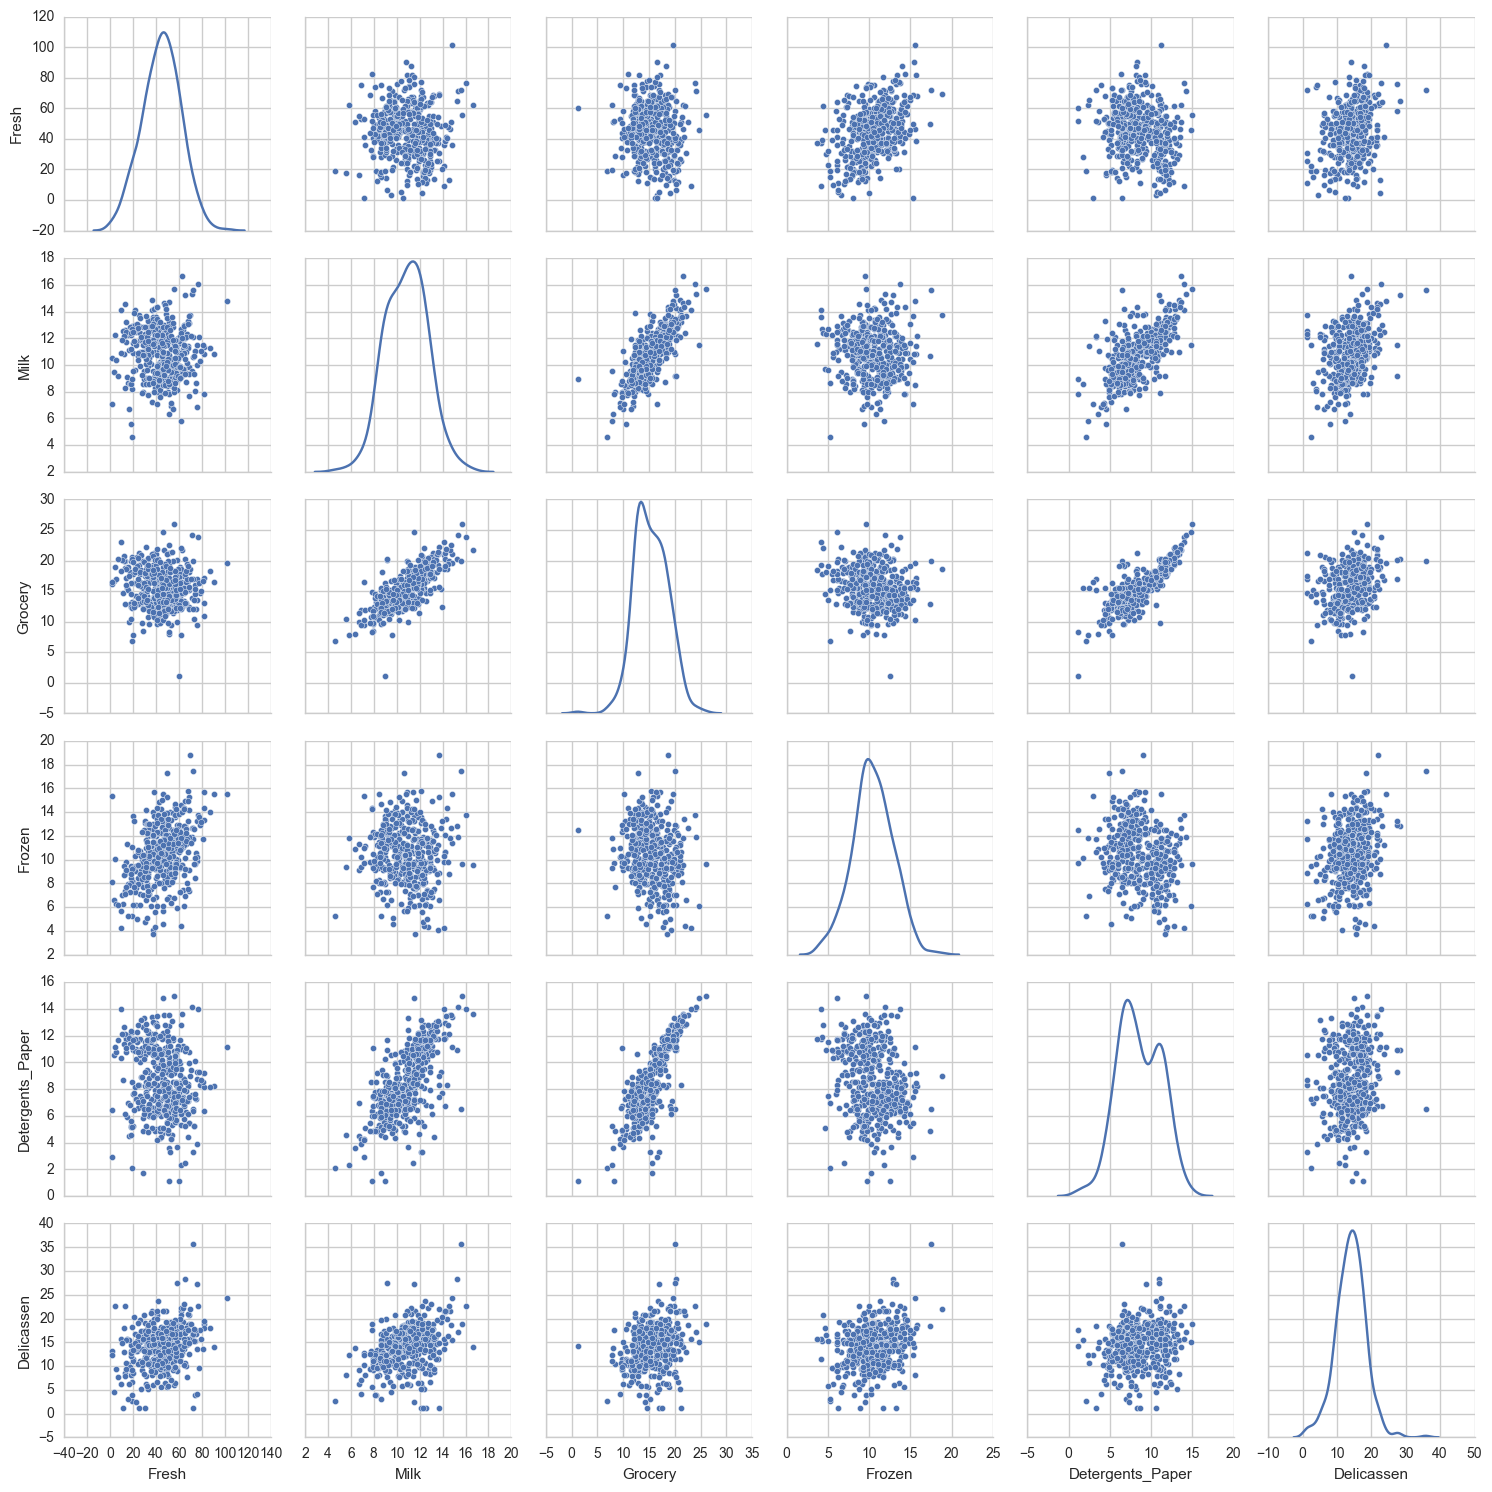

In [76]:
sns.pairplot(products.apply(lambda x:stats.boxcox(x)[0]).drop(['total'], axis=1), diag_kind="kde", palette='hus1')

They now seem to be nearly normally distributed.

In [8]:
alpha = []
for index, col in enumerate(products.drop(['total'], axis=1).columns):
     _, temp = stats.boxcox(products[col])
     alpha.append(temp)

In [41]:
alpha 

[0.29532163236423292,
 0.066934829561379416,
 0.12802500287367555,
 0.089493752411826527,
 0.061425109828594178,
 0.19098107364975894]

In [9]:
products = products.apply(lambda x:stats.boxcox(x)[0]).drop(['total'], axis=1)

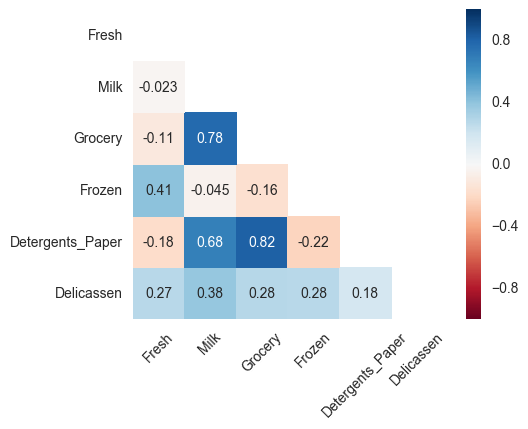

In [78]:
corr = products.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')
    plt.xticks(rotation=45, ha='center')

<a id='#Outliers'></a>

# Outliers
[[ go back to the top ]](#Table-of-contents)<br>
#### Here are some changes you can make to your model:

<b>Use a model that's resistant to outliers.</b><br>
Tree-based models are generally not as affected by outliers, while regression-based models are. If you're performing a statistical test, try a non-parametric test instead of a parametric one.
<br>
<b>Use a more robust error metric.</b><br>
Switching from mean squared error to mean absolute difference (or something like Huber Loss) reduces the influence of outliers. Why is the median a measure of central tendency?
<br>
<b>Here are some changes you can make to your data:</b><br>
<br>
Winsorize your data. Artificially cap your data at some threshold. <br>
Transform your data. If your data has a very pronounced right tail, try a log transformation.<br>
Remove the outliers. This works if there are very few of them and you're fairly certain they're anomalies and not worth predicting.<br>

C:\Users\Vini\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


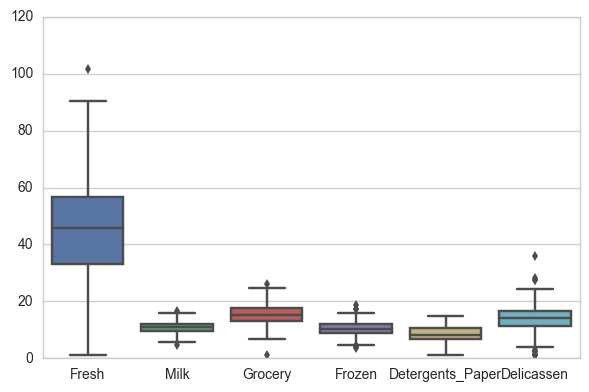

In [80]:
sns.boxplot(products)
plt.tight_layout()

So there are some outliers.<br> Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [84]:
# Track index of outliers for removal
from collections import Counter
outlier_indices = []
cnt = Counter()

# For each feature find the data points with extreme high or low values
for feature in products.columns:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(products[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(products[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = products[~((products[feature] >= Q1 - step) & (products[feature] <= Q3 + step))]
    print(feature_outliers)
    outlier_indices.extend(feature_outliers.index)
    
# Select the indices for data points you wish to remove
for c in outlier_indices: cnt[c] += 1
print("Indices for data point outliers: {}".format(cnt.most_common(5)))

Data points considered outliers for the feature 'Fresh':
          Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicassen
181  101.573143  14.821915  19.601092  15.50805         11.172697   24.271947
Data points considered outliers for the feature 'Milk':
         Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicassen
86   62.288609  16.688053  21.679026  9.536029         13.638422   13.972230
154  19.248391   4.596233   6.853242  5.270266          2.066981    2.552898
Data points considered outliers for the feature 'Grocery':
        Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicassen
75  60.062043   8.986896   1.179625  12.503507          1.136529   14.255725
85  55.798197  15.720152  25.969331   9.607979         14.972315   18.835821
Data points considered outliers for the feature 'Frozen':
         Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicassen
38   37.459452  13.586912  19.312696   4.105383         11.753132   11.456

In [10]:
# Remove the outliers, if any were specified
good_data = products.drop(products.index[[154, 183]]).reset_index(drop = True)

C:\Users\Vini\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


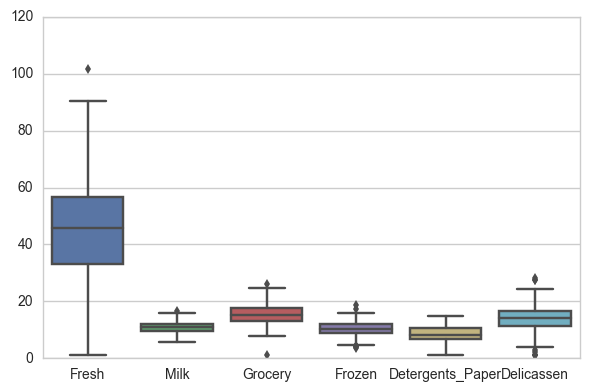

In [86]:
sns.boxplot(good_data)
plt.tight_layout()

<a id='#Feature-Selection'></a>

# Feature Selection

[[ go back to the top ]](#Table-of-contents)

In [11]:
# It is usually advisable to standardize data before PCA , but here as the units are the same (M.U) it 
#wouldnt make a difference.
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
good_data_pca = pca.fit_transform(good_data)

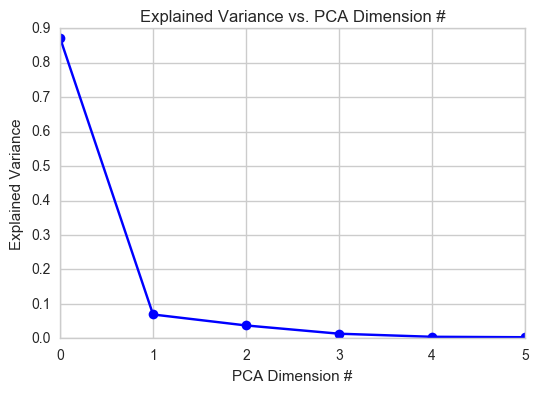

In [89]:
# Plot the PCA Explained Variance Ratio as function of PCA dimension number
plt.plot(pca.explained_variance_ratio_, 'bo-') 

plt.title('Explained Variance vs. PCA Dimension #')
plt.xlabel('PCA Dimension #')
plt.ylabel('Explained Variance')

plt.show()

In [94]:
pca.explained_variance_ratio_[:3].sum()

0.97886628342292981

98% of the variance in the data can be explained by 3 principal components alone.

In [96]:
pca.explained_variance_ratio_[:4].sum()

0.99229866725983806

99% is explained by 4 pcs

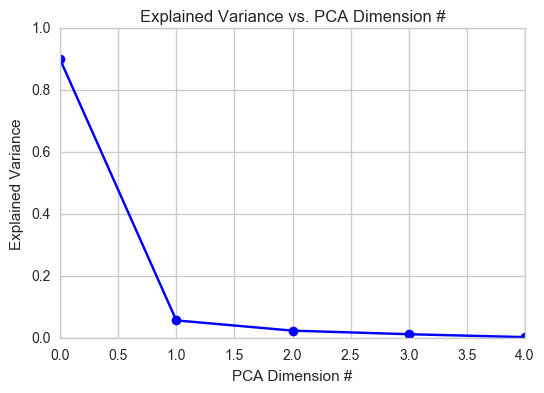

In [101]:
#lets find out if removing 'Grocery' (as discussed previously) would make any difference.
# Plot the PCA Explained Variance Ratio as function of PCA dimension number
pca1 = PCA(n_components=5)
pca1.fit_transform(good_data.drop(['Grocery'], axis=1))
plt.plot(pca1.explained_variance_ratio_, 'bo-') 

plt.title('Explained Variance vs. PCA Dimension #')
plt.xlabel('PCA Dimension #')
plt.ylabel('Explained Variance')

plt.show()

In [103]:
pca1.explained_variance_ratio_[:4].sum()

0.99609153404273587

Not a big difference there!<br>
PCA will use the features with higher variance to build the components. Given the descriptive statistics, the Fresh feature has the highest standard deviation (12647.329) and the largest range in values (min=3.0 and max= 112151.0). Based on the descriptive statistic we could expect Fresh, Grocery and Milk to be highly important for the first and the second PCA components.

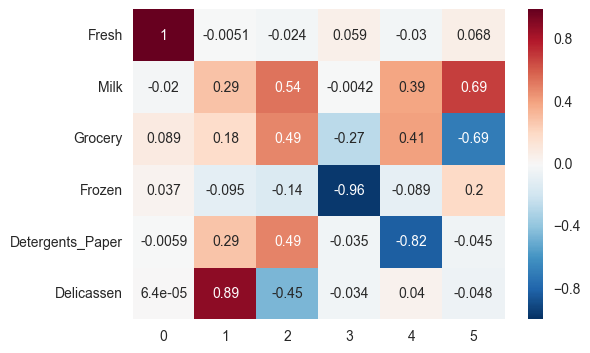

In [110]:
sns.heatmap(pd.DataFrame(pca.components_, good_data.columns), annot=True)   

In [112]:
pca.components_[0]

array([ 0.99513835, -0.00512113, -0.02430941,  0.05913092, -0.02993452,
        0.06848318])

Keeping just the 2 PCs as 4D(even 3D) is hard to visualize

In [12]:
pca = PCA(n_components=2)
good_data_pca = pca.fit_transform(good_data)

<a id='#clustering'></a>

# Clustering

[[ go back to the top ]](#Table-of-contents)

Cluster analysis, a category of unsupervised learning techniques that allows us to discover hidden structures in data where we do not know the right answer upfront. The goal of clustering is to find a natural grouping in data such that items in the same cluster are more similar to each other than those from different clusters.

<a id='#K means'></a>

## K Means

[[ go back to the top ]](#Table-of-contents) <br>
The k-means algorithm is extremely easy to implement but is also computationally very efficient compared to other clustering algorithms, which might explain its popularity. The k-means algorithm belongs to the category of prototype-based clustering. While k-means is very good at identifying clusters of spherical shape, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters k a priori. An inappropriate choice for k can result in poor clustering performance. The elbow method and silhouette plots are useful techniques to evaluate the quality of a clustering to help us determine the optimal number of clusters k.
In order to quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE(distortion) that we discussed earlier in this chapter—to compare the performance of different k-means clusterings. Conveniently, we don't need to compute the within-cluster SSE explicitly as it is already accessible via the inertia_ attribute after fitting a KMeans model.<br>
The classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE. Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.<b>(Sebastian Raschka 'Python Machine Learning')</b> <br>
Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. Silhouette refers to a method of interpretation and validation of consistency within clusters of data. This measure has a range of [-1, 1]. The technique provides a succinct graphical representation of how well each object lies within its cluster.The silhouette analysis is used to choose an optimal value for n_clusters. When the number of clusters chosen is a bad pick for the given data it will show on the silhoutte plots as clusters with below average silhouette scores and wide fluctuations in the size of the plots.<br>
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.<br>

2clusters:  0.48378
3clusters:  0.43334
4clusters:  0.39952
5clusters:  0.37995
6clusters:  0.33569
7clusters:  0.35077
8clusters:  0.35702
9clusters:  0.33379
10clusters:  0.35303


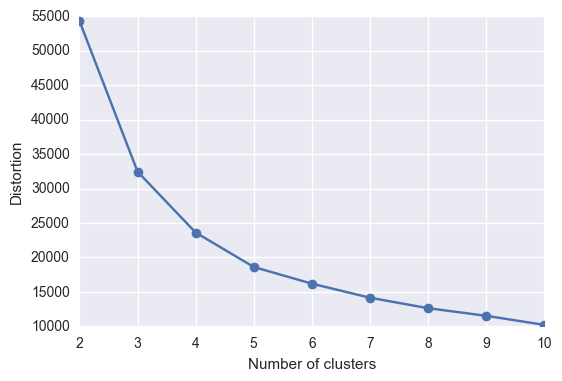

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distortions = []
sil_scores = []
for i in range(2, 11):
   km = KMeans(n_clusters=i, 
                init='k-means++', 
               n_init=10,                 
               max_iter=300, 
               random_state=0)
   km.fit(good_data_pca)
   preds = km.predict(good_data_pca)
   score = silhouette_score(good_data_pca, preds)
   sil_scores.append(score)
   print(str(i) + 'clusters: ', score.round(5))
   distortions.append(km.inertia_)
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

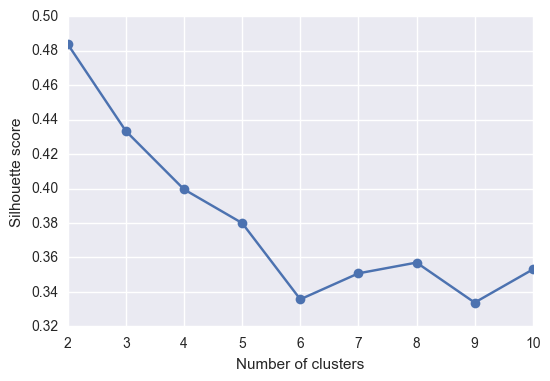

In [19]:
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

k = 3(or 4) seems like a reasonable choice ..2-cluster-clustering has maximum silhouette score but based on EDA 2 clusters is too simplistic. <br>
Through a visual inspection of the silhouette plot, we can quickly scrutinize the sizes of the different clusters and identify clusters that contain outliers.

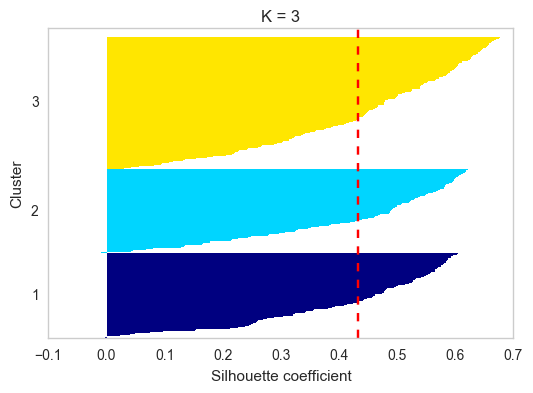

In [47]:
sns.set_style("whitegrid", {'axes.grid' : False})
km = KMeans(n_clusters=3, 
             init='k-means++', 
             n_init=10, 
             max_iter=300,
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(good_data_pca)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(good_data_pca, 
                                    y_km, 
                                    metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
            edgecolor='none', 
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red", 
             linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("K = 3")
plt.show()

Cluster 3 has greater width than 2 and 1 .Let's try k = 4 . 

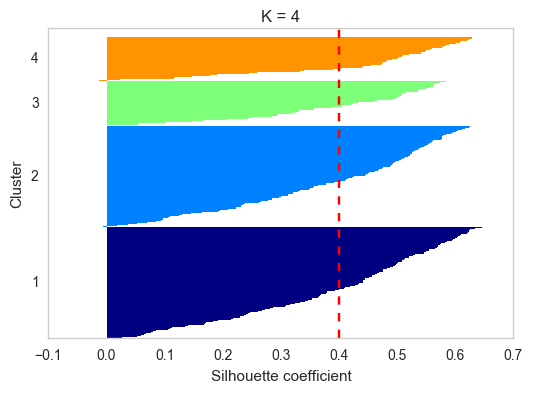

In [28]:
km = KMeans(n_clusters=4, 
             init='k-means++', 
             n_init=10, 
             max_iter=300,
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(good_data_pca)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(good_data_pca, 
                                    y_km, 
                                    metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
            edgecolor='none', 
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
             color="red", 
             linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("K = 4")
plt.show()

Ok, maybe k = 3 was better.

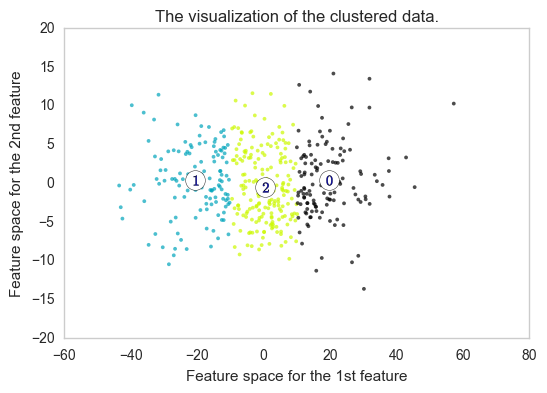

In [48]:
# Plot showing the actual clusters formed (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
km = KMeans(n_clusters=3, 
             init='k-means++', 
             n_init=10, 
             max_iter=300,
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(good_data_pca)
colors = cm.spectral(y_km.astype(float) / 3)
plt.scatter(good_data_pca[:, 0], good_data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
# Labeling the clusters
centers = km.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and box-cox transformed(digression - np.exp is the inverse function of np.log), we can recover the representative customer spending from these data points by applying the inverse transformations.

In [54]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)
log_centers

array([[ 64.42516068,  10.87336351,  15.17462922,  11.60222429,
          8.1382641 ,  15.59893414],
       [ 24.37869137,  11.0729237 ,  16.14096386,   9.22273671,
          9.33424407,  12.82780479],
       [ 45.19681801,  10.71477934,  15.17356636,  10.46226986,
          8.37531264,  13.67487933]])

In [57]:
# Reverse the box-cox 
true_centers = np.ndarray(shape=log_centers.shape)
from scipy.special import inv_boxcox
for i in range(0,len(log_centers)):
    for j in range(0,len(log_centers[i])):
        true_centers[i][j] = inv_boxcox(log_centers[i][j],alpha[j])

In [58]:
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_data.columns)
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,25550.0,3533.0,4586.0,2856.0,735.0,1382.0
Segment 1,1242.0,3964.0,6326.0,832.0,1601.0,655.0
Segment 2,8261.0,3222.0,4584.0,1609.0,860.0,832.0


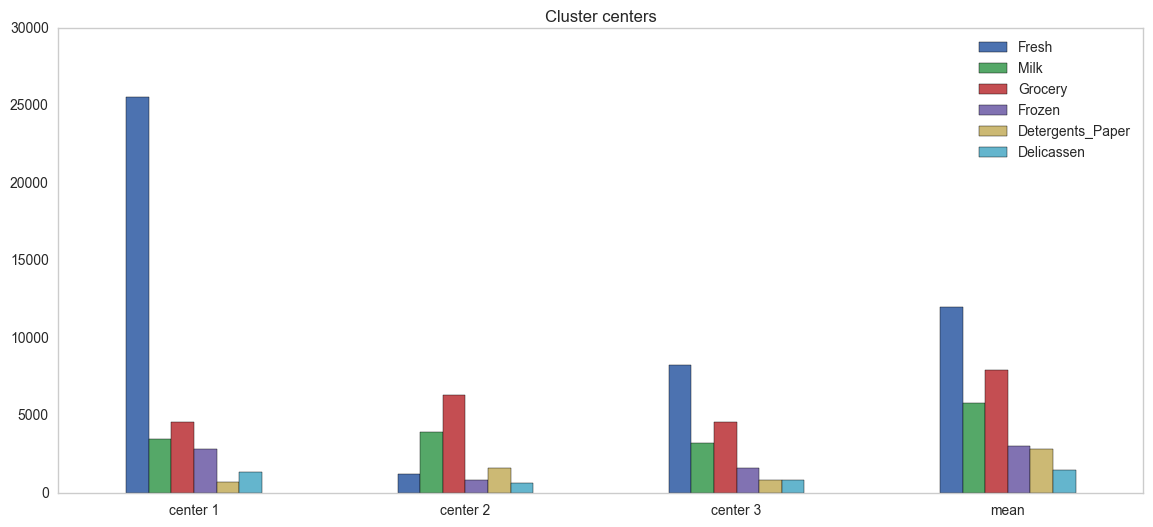

In [62]:
centers_bar = true_centers.append(data.drop(['Channel','Region'], axis=1).describe().loc['mean'])
centers_bar.index = ['center 1', 'center 2', 'center 3', 'mean']
_ = centers_bar.plot(kind='bar', figsize=(14,6),rot=0, title='Cluster centers')

In [64]:
true_centers['total'] = true_centers.sum(axis=1)
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
Segment 0,25550.0,3533.0,4586.0,2856.0,735.0,1382.0,77284.0
Segment 1,1242.0,3964.0,6326.0,832.0,1601.0,655.0,29240.0
Segment 2,8261.0,3222.0,4584.0,1609.0,860.0,832.0,38736.0


In [64]:
true_centers['total'] = true_centers.sum(axis=1)
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
Segment 0,25550.0,3533.0,4586.0,2856.0,735.0,1382.0,77284.0
Segment 1,1242.0,3964.0,6326.0,832.0,1601.0,655.0,29240.0
Segment 2,8261.0,3222.0,4584.0,1609.0,860.0,832.0,38736.0


'Fresh' was indeed the decisive element in the first principal component hence it is not surprising that it kind of dictates how the segmentation is done. <br> 
Let's see how this segmentation scheme makes sense if we bring 'channel'('Retailers' or 'Hotels/Restaurants/Cafes') into the picture.

In [81]:
prod_w_channel = pd.DataFrame(data['Channel'], columns = ['Channel'])
prod_w_channel = prod_w_channel.drop(prod_w_channel.index[[154, 183]]).reset_index(drop = True)

In [83]:
good_data_chan_pca = pd.concat([pd.DataFrame(good_data_pca), prod_w_channel], axis = 1)

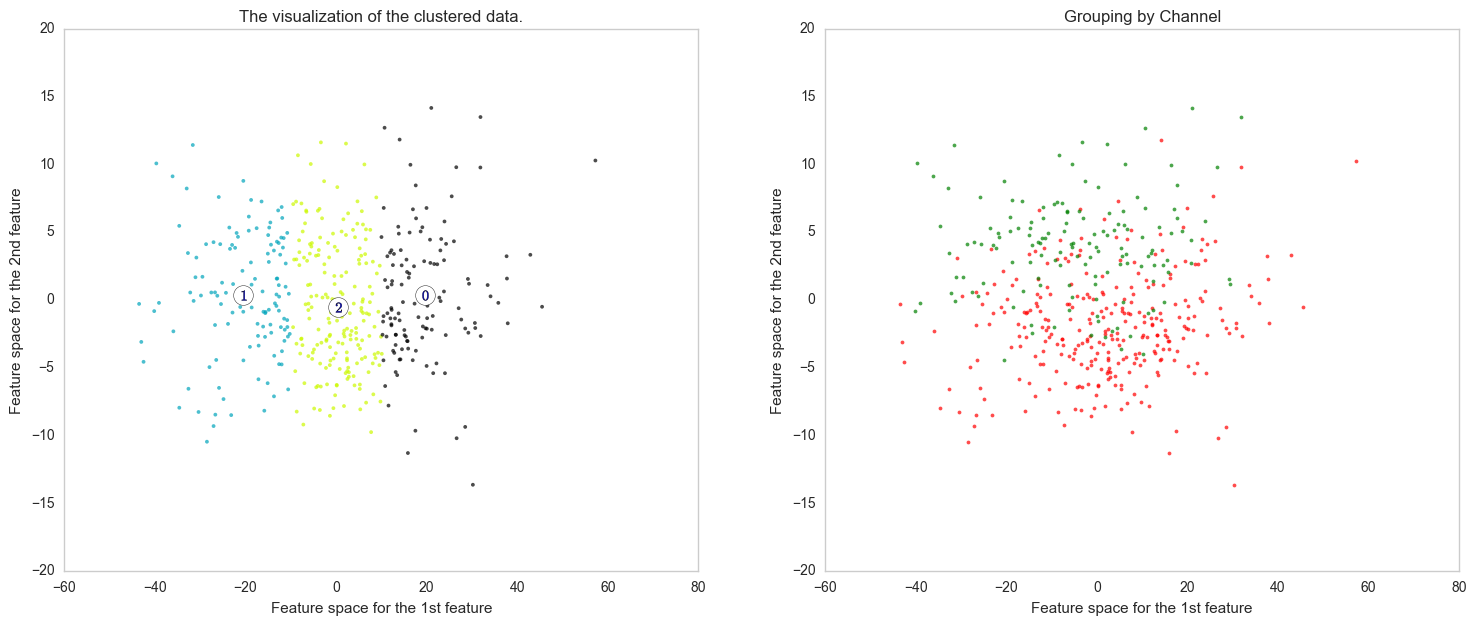

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
#First subplot - K measn clustering with cluster centers
colors = cm.spectral(y_km.astype(float) / 3)
ax1.scatter(good_data_pca[:, 0], good_data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
# Labeling the clusters
centers = km.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
for i, c in enumerate(centers):
        ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
ax1.set_title("The visualization of the clustered data.")
ax1.set_xlabel("Feature space for the 1st feature")
ax1.set_ylabel("Feature space for the 2nd feature")
#Second subplot grouping by channel
# Color map
cmap1 = ['r', 'g']
# Color the points based on assigned Channel
labels = ['Hotel/Restaurant/Cafe', 'Retailer']
grouped = good_data_chan_pca.groupby('Channel')
for i, channel in grouped:   
     ax2.scatter(channel[0], channel[1], marker='.', s=30, lw=0, alpha=0.7,
                color = cmap1[i-1], label = labels[i-1])
ax2.set_title("Grouping by Channel")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

Hence the segments does not correspond to the grouping of datapoints into that of 'Hotel/Restaurant/Cafe' or 'Retailer'.

<a id='#GMM'></a>

## Gaussian Mixture Model

[[ go back to the top ]](#Table-of-contents) <br>
K means starts with the assumption that a given data point belongs to one cluster. Choose a data point. At a given point in the algorithm, we are certain that a point belongs to a cluster 1. In the next iteration, we might revise that belief, and be certain that it belongs to the cluster 2. However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment".Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible in that they can assign a data point to more than one cluster.An example of soft clustering is GMM.<br> 
When clustering with GMMs, the score is the posterior probability. Using an iterative technique called Expectation Maximization, the process and result is very similar to k-means clustering. The difference is that the clusters are assumed to each have an independent Gaussian distribution, each with their own mean and covariance matrix.<br>

In [99]:
from sklearn.mixture import GMM
for i in [2,3,4]:
   gmm =  GMM(n_components=i)
   gmm.fit(good_data_pca)
   preds = gmm.predict(good_data_pca)
   score = silhouette_score(good_data_pca, preds)
   print(str(i) + 'clusters silhoutte: ', score.round(5))
   print(str(i) + 'clusters bic      : ', gmm.bic(good_data_pca))

C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function

2clusters silhoutte:  0.4869
2clusters bic      :  6365.40380319
3clusters silhoutte:  0.33129
3clusters bic      :  6383.38699779


C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

4clusters silhoutte:  0.29447
4clusters bic      :  6410.15369254


C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_m

- 2 clusters silhoutte:  0.4869
- 2 clusters bic      :  6365.40380319
- 3 clusters silhoutte:  0.33129
- 3 clusters bic      :  6383.38699779
- 4 clusters silhoutte:  0.29447
- 4 clusters bic      :  6410.15369254
The Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models. The model with the lowest BIC is preferred (the lower the better).

<a id='#GMM eval'></a>

### GMM Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function

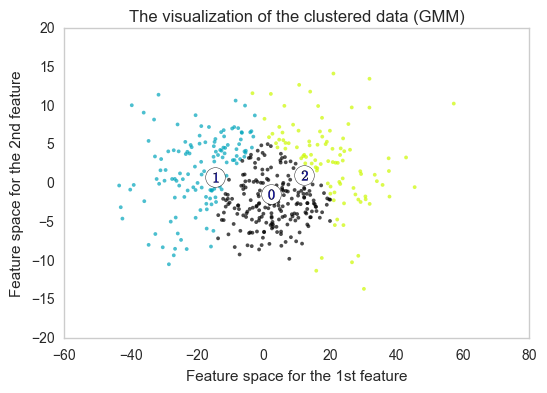

In [100]:
# Plot showing the actual clusters formed (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
gmm =  GMM(n_components=3)
y_gmm = gmm.fit_predict(good_data_pca)
colors = cm.spectral(y_gmm.astype(float) / 3)
plt.scatter(good_data_pca[:, 0], good_data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
# Labeling the clusters
centers = gmm.means_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
plt.title("The visualization of the clustered data (GMM)")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

In [101]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)
log_centers

array([[ 47.48259641,   9.81537287,  14.45388675,  10.8220945 ,
          8.08414798,  15.44638983],
       [ 30.48080392,  10.26303103,  15.51471005,   9.87674476,
          9.05466693,  16.00459998],
       [ 57.32259006,  10.19718534,  14.99588026,  11.55812553,
          8.34208419,  18.68616825]])

In [102]:
# Reverse the box-cox 
true_centers = np.ndarray(shape=log_centers.shape)
from scipy.special import inv_boxcox
for i in range(0,len(log_centers)):
    for j in range(0,len(log_centers[i])):
        true_centers[i][j] = inv_boxcox(log_centers[i][j],alpha[j])

In [103]:
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_data.columns)
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,9652.0,1891.0,3575.0,1935.0,709.0,1330.0
Segment 1,2434.0,2471.0,5143.0,1184.0,1339.0,1529.0
Segment 2,17566.0,2376.0,4314.0,2795.0,841.0,2849.0


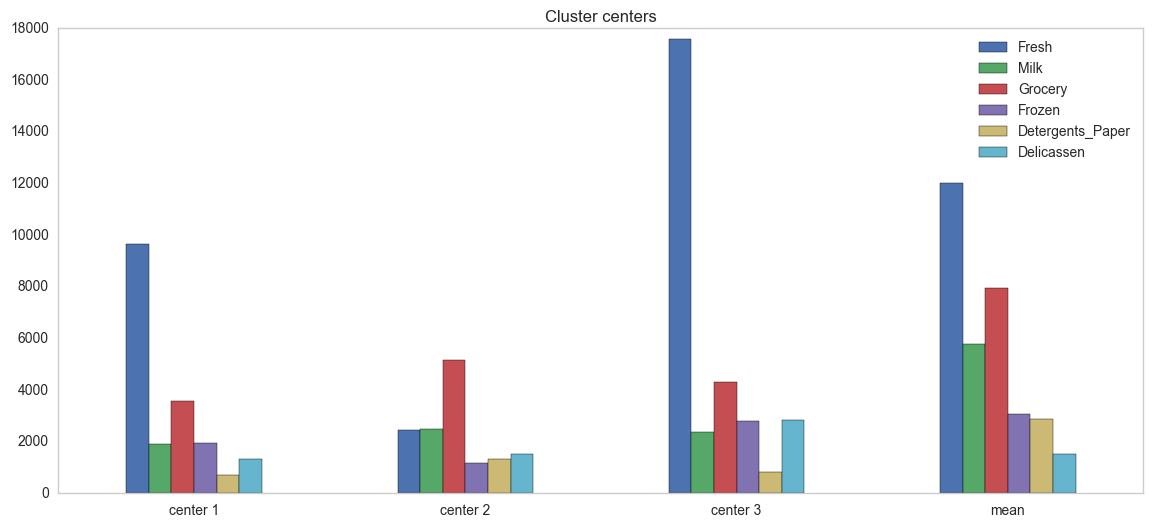

In [104]:
centers_bar = true_centers.append(data.drop(['Channel','Region'], axis=1).describe().loc['mean'])
centers_bar.index = ['center 1', 'center 2', 'center 3', 'mean']
_ = centers_bar.plot(kind='bar', figsize=(14,6),rot=0, title='Cluster centers')

<a id='#hier'></a>

## Hierachical Clustering techniques

[[ go back to the top ]](#Table-of-contents) <br>
An alternative approach to prototype-based clustering: hierarchical clustering. One advantage of hierarchical clustering algorithms is that it allows us to plot dendrograms (visualizations of a binary hierarchical clustering), which can help with the interpretation of the results by creating meaningful taxonomies. Another useful advantage of this hierarchical approach is that we do not need to specify the number of clusters upfront.
The two main approaches to hierarchical clustering are agglomerative and divisive hierarchical clustering. In divisive hierarchical clustering, we start with one cluster that encompasses all our samples, and we iteratively split the cluster into smaller clusters until each cluster only contains one sample. Agglomerative clustering takes the opposite approach. We start with each sample as an individual cluster and merge the closest pairs of clusters until only one cluster remains.
The two standard algorithms for agglomerative hierarchical clustering are single linkage and complete linkage. Using single linkage, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest. The complete linkage approach is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge. Other commonly used algorithms for agglomerative hierarchical clustering include average linkage and Ward's linkage. In average linkage, we merge the cluster pairs based on the minimum average distances between all group members in the two clusters. In Ward's method, those two clusters that lead to the minimum increase of the total within-cluster SSE are merged.
<br>
<b> Sebastian Raschka "Python Machine Learning"</b>

In [111]:
from sklearn.cluster import AgglomerativeClustering
for i in [2,3,4]:
   ac = AgglomerativeClustering(n_clusters=i,
                              affinity='euclidean', linkage='complete')
   #ac.fit(good_data_pca)
   preds = ac.fit_predict(good_data_pca)
   score = silhouette_score(good_data_pca, preds)
   print(str(i) + 'clusters silhoutte: ', score.round(5))

2clusters silhoutte:  0.46632
3clusters silhoutte:  0.41842
4clusters silhoutte:  0.39235


<a id='#hier'></a>

### Hierarchical Clustering Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

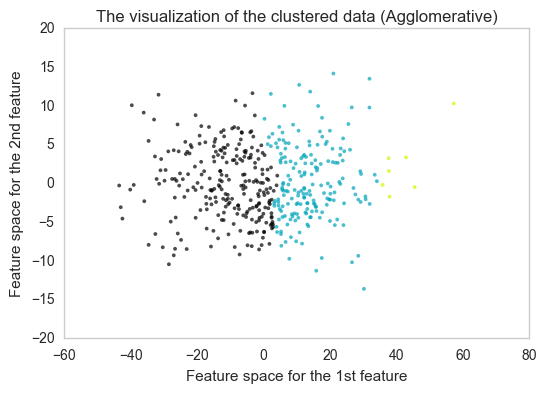

In [113]:
ac = AgglomerativeClustering(n_clusters=3,
                              affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(good_data_pca)
colors = cm.spectral(y_ac.astype(float) / 3)
plt.scatter(good_data_pca[:, 0], good_data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
plt.title("The visualization of the clustered data (Agglomerative)")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

In [119]:
ac_clusters = pd.DataFrame(good_data_pca)
ac_clusters['label'] = y_ac

In [133]:
medians = ac_clusters.groupby('label').median().values

In [134]:
# Inverse transform the centers
log_centers = pca.inverse_transform(medians)
log_centers

array([[ 35.76753005,  10.04879875,  15.04951372,  10.14858729,
          8.65692527,  15.41390832],
       [ 57.71786007,   9.8854083 ,  14.42765299,  11.49127827,
          7.93410464,  16.99783683],
       [ 82.70795904,  10.17565139,  14.57868062,  13.16028309,
          7.7202661 ,  21.44870998]])

In [135]:
# Reverse the box-cox 
true_centers = np.ndarray(shape=log_centers.shape)
from scipy.special import inv_boxcox
for i in range(0,len(log_centers)):
    for j in range(0,len(log_centers[i])):
        true_centers[i][j] = inv_boxcox(log_centers[i][j],alpha[j])

In [136]:
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_data.columns)
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3978.0,2175.0,4394.0,1367.0,1035.0,1319.0
Segment 1,17957.0,1972.0,3543.0,2705.0,641.0,1942.0
Segment 2,57337.0,2346.0,3735.0,5983.0,555.0,5050.0


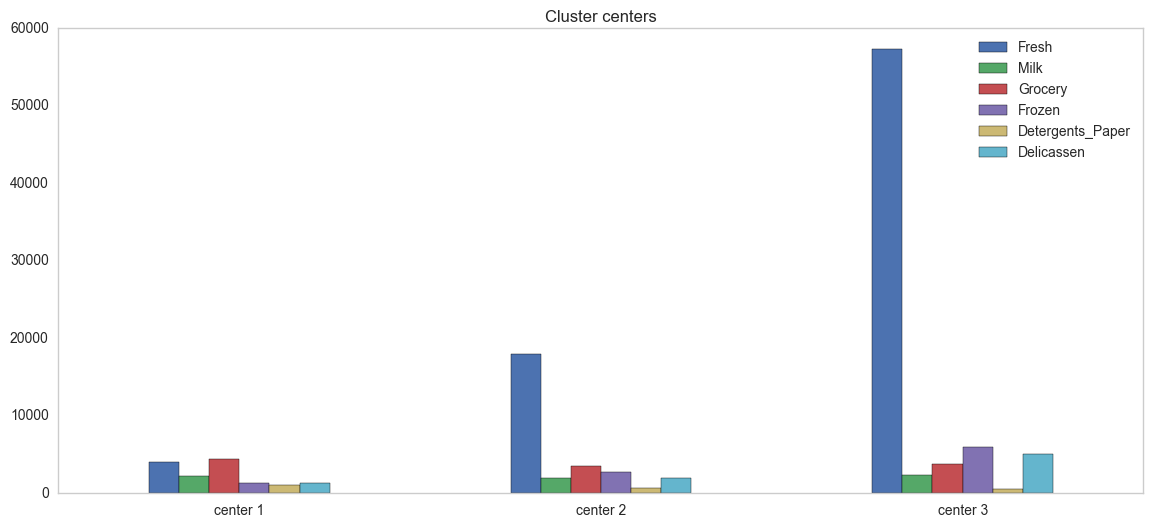

In [138]:
centers_bar = true_centers
centers_bar.index = ['center 1', 'center 2', 'center 3']
_ = centers_bar.plot(kind='bar', figsize=(14,6),rot=0, title='Cluster centers')

<a id='#dbscan'></a>

## Density-based Spatial Clustering of Applications with Noise (DBSCAN)

[[ go back to the top ]](#Table-of-contents)
The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. <br>
The notion of density in DBSCAN is defined as the number of points within a specified radius. <br>
In DBSCAN, a special label is assigned to each sample (point) using the following criteria:<br>
- A point is considered as core point if at least a specified number (MinPts) of neighboring points fall within the specified radius 
- A border point is a point that has fewer neighbors than MinPts within , but lies within the  radius of a core point 
- All other points that are neither core nor border points are considered as noise points .<br>
<br>
After labeling the points as core, border, or noise points, the DBSCAN algorithm can be summarized in two simple steps:<br>
-- Form a separate cluster for each core point or a connected group of core points (core points are connected if they are no farther away than ). <br>
-- Assign each border point to the cluster of its corresponding core point.
<br>
<b> Sebastian Raschka "Python Machine Learning"</b> 
It doesn’t require that you input the number of clusters in order to run. But in exchange, you have to tune two other parameters.The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.<br>
One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points.<br>
With an increasing number of features in our dataset—given a fixed size training set—the negative effect of the curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance metric. However, the problem of the curse of dimensionality is not unique to DBSCAN; it also affects other clustering algorithms that use the Euclidean distance metric, for example, the k-means and hierarchical clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and ) that need to be optimized to yield good clustering results. Finding a good combination of MinPts and eps can be problematic if the density differences in the dataset are relatively large.<br>
<b> Sebastian Raschka "Python Machine Learning"</b> 

In [17]:
# I am skipping the hyperparameter tuning part for the time being
#from http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN().fit(good_data_pca)
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

<a id='#K means'></a>

## K Means

[[ go back to the top ]](#Table-of-contents)

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

<a id='#K means'></a>

## K Means

[[ go back to the top ]](#Table-of-contents)

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

<a id='#K means'></a>

## K Means

[[ go back to the top ]](#Table-of-contents)

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

<a id='#K means'></a>

## K Means

[[ go back to the top ]](#Table-of-contents)

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

<a id='#K means'></a>

## K Means

[[ go back to the top ]](#Table-of-contents)

<a id='#K means eval'></a>

### K Means Evaluation and Interpretation

[[ go back to the top ]](#Table-of-contents)

<a id='#Pipeline'></a>

# A single Pipeline

[[ go back to the top ]](#Table-of-contents)


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

<a id='#Pickle'></a>

# Finalize the model

[[ go back to the top ]](#Table-of-contents)
##### Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python.
You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
Later you can load this file to deserialize your model and use it to make new predictions.
<br>
#Running the example saves the model to finalized_model.sav in your local working directory<br>
import pickle<br>
test_size = 0.33<br>
seed = 7<br>
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)<br>
#Fit the model on 33%<br>
model = LogisticRegression()<br>
model.fit(X_train, Y_train)<br>
#save the model to disk<br>
filename = 'finalized_model.sav'<br>
pickle.dump(model, open(filename, 'wb'))<br>
<br>
#load the model from disk<br>
loaded_model = pickle.load(open(filename, 'rb'))<br>
result = loaded_model.score(X_test, Y_test)<br>
print(result)<br>

<a id='#time'></a>

# If I had more time ....

[[ go back to the top ]](#Table-of-contents)

<a id='#Acknowledgement'></a>

# Acknowledgements

[[ go back to the top ]](#Table-of-contents)
<br>
<br>
http://blog.yhat.com/posts/customer-segmentation-python-rodeo.html<br>
Python Machine Learning book by Sebastian Raschka
http://machinelearningmastery.com<br>
Notebook by [Randal S. Olson](http://www.randalolson.com/)<br>
http://www.ultravioletanalytics.com<br>
https://www.analyticsvidhya.com<br>
https://sebastianraschka.com/<br>